In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir('/content/drive/My Drive')
import pandas as pd

# Load the file with correct encoding
df = pd.read_csv('/content/drive/My Drive/Sample - Superstore.csv', encoding='latin1')

# Show the first few rows
df.head()
df.shape
df.info()
df.isnull().sum()
df.dtypes
df['Category'].unique()
df['Sub-Category'].unique()
df['Region'].unique()
df.columns = df.columns.str.strip()
df.columns



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region        

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit by Category')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
df.columns = df.columns.str.strip()
df.columns
df.duplicated().sum()
df.drop_duplicates(inplace=True)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])




In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
df.columns


Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df[['Order Date', 'Ship Date']].dtypes

,0
Order Date,datetime64[ns]
Ship Date,datetime64[ns]


In [ ]:
df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766
Ativa V4110MDD Micro-Cut Shredder,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,3696.2820
Ibico EPK-21 Electric Binding System,3345.2823


In [ ]:
df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


In [ ]:
df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

,Profit
Region,
West,108418.4489
East,91534.8388
South,46749.4303
Central,39706.3625


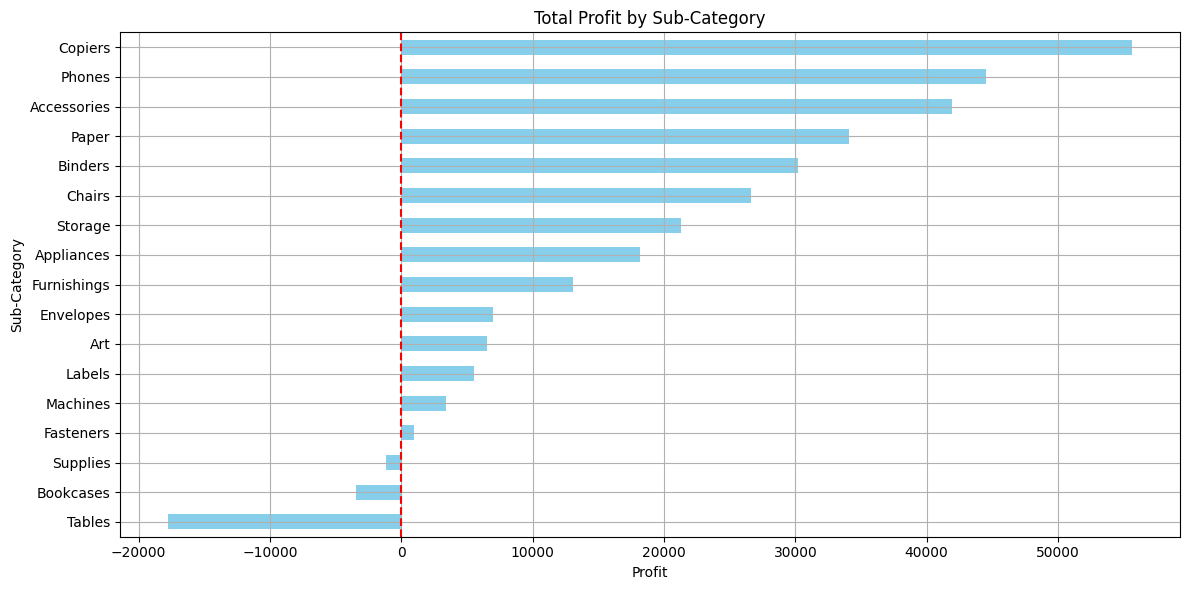

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(12,6))
df.groupby('Sub-Category')['Profit'].sum().sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Profit by Sub-Category')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.savefig("profit_by_subcategory.png", bbox_inches='tight')
plt.show()
from google.colab import files
files.download("profit_by_subcategory.png")


In [ ]:
df['Month'] = df['Order Date'].dt.to_period('M')


In [ ]:
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("monthly_sales_trend.png", bbox_inches='tight')
plt.show()


KeyError: 'Month'

In [ ]:
df['Month'] = df['Order Date'].dt.to_period('M')  # 'M' gives us "YYYY-MM"


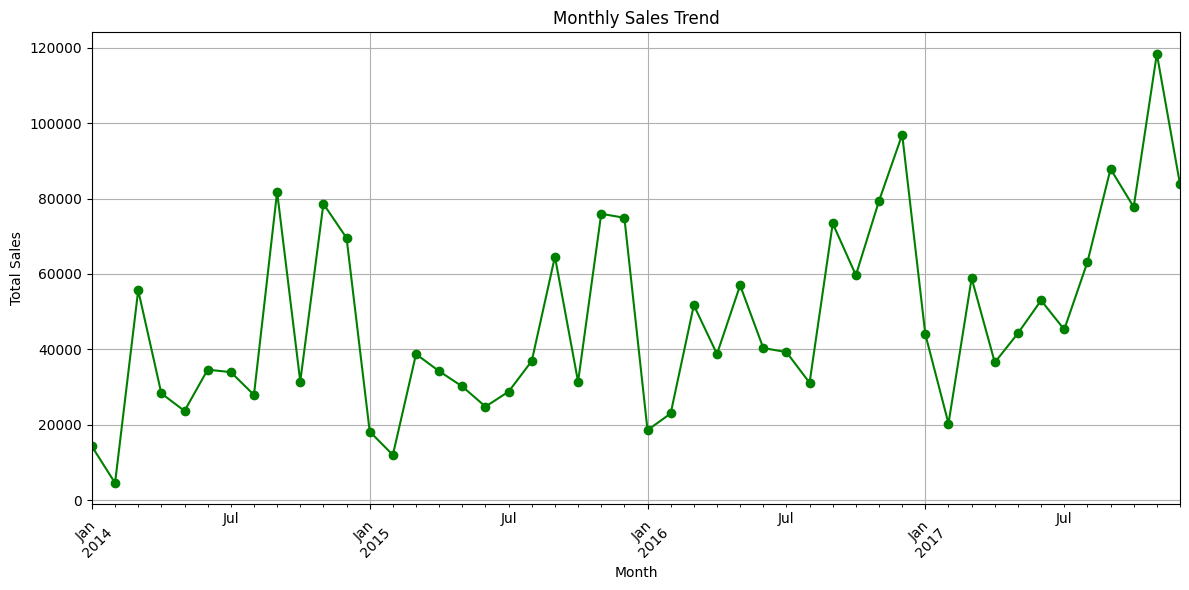

In [ ]:
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("monthly_sales_trend.png", bbox_inches='tight')
plt.show()


In [ ]:
from google.colab import files
files.download("monthly_sales_trend.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

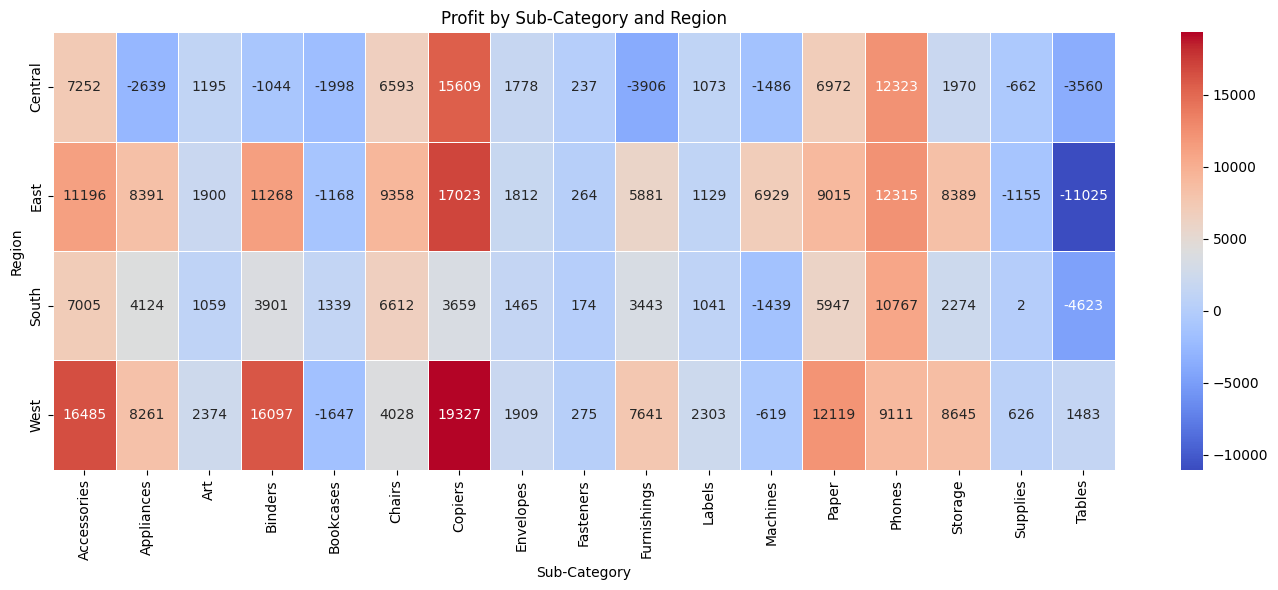

In [ ]:
pivot_table = df.pivot_table(values='Profit', index='Region', columns='Sub-Category', aggfunc='sum')

plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".0f", linewidths=0.5)
plt.title('Profit by Sub-Category and Region')
plt.tight_layout()
plt.savefig("region_subcategory_heatmap.png", bbox_inches='tight')
plt.show()


In [ ]:
files.download("region_subcategory_heatmap.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/My Drive')


['Colab Notebooks',
 'Sample - Superstore.csv',
 'My resume.pdf',
 'student_performance_data.gsheet',
 'Dataset for Project:  CONCAT function.gsheet']

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Sample - Superstore.csv', encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Drop unnecessary columns if still there
df.drop(columns=[col for col in ['Row ID', 'Postal Code'] if col in df.columns], inplace=True)

# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Strip column names (just in case)
df.columns = df.columns.str.strip()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Sample - Superstore.csv', encoding='latin1')


In [ ]:
# Drop extra columns if needed
df.drop(columns=[col for col in ['Row ID', 'Postal Code'] if col in df.columns], inplace=True)

# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


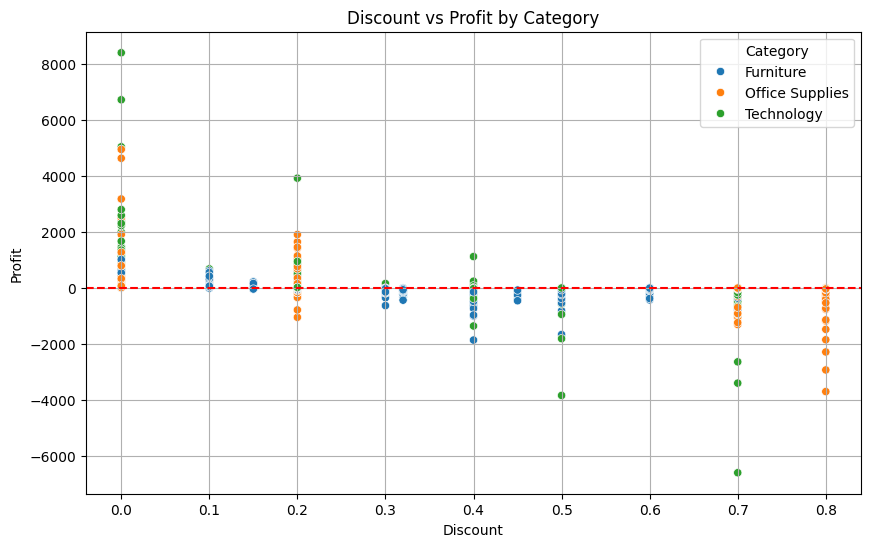

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit by Category')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.savefig("discount_vs_profit.png", bbox_inches='tight')
plt.show()


In [ ]:
from google.colab import files
files.download("discount_vs_profit.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=False)


,Profit
Category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


In [ ]:
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)


,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


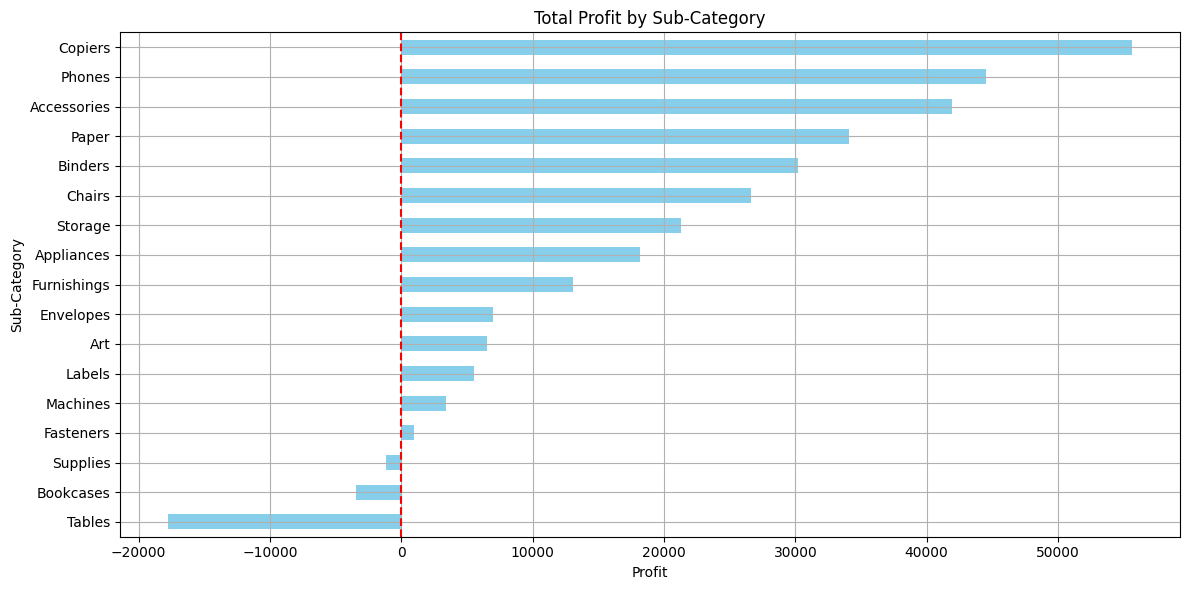

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df.groupby('Sub-Category')['Profit'].sum().sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Profit by Sub-Category')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df['Month'] = df['Order Date'].dt.to_period('M')


In [ ]:
monthly_sales = df.groupby('Month')['Sales'].sum()


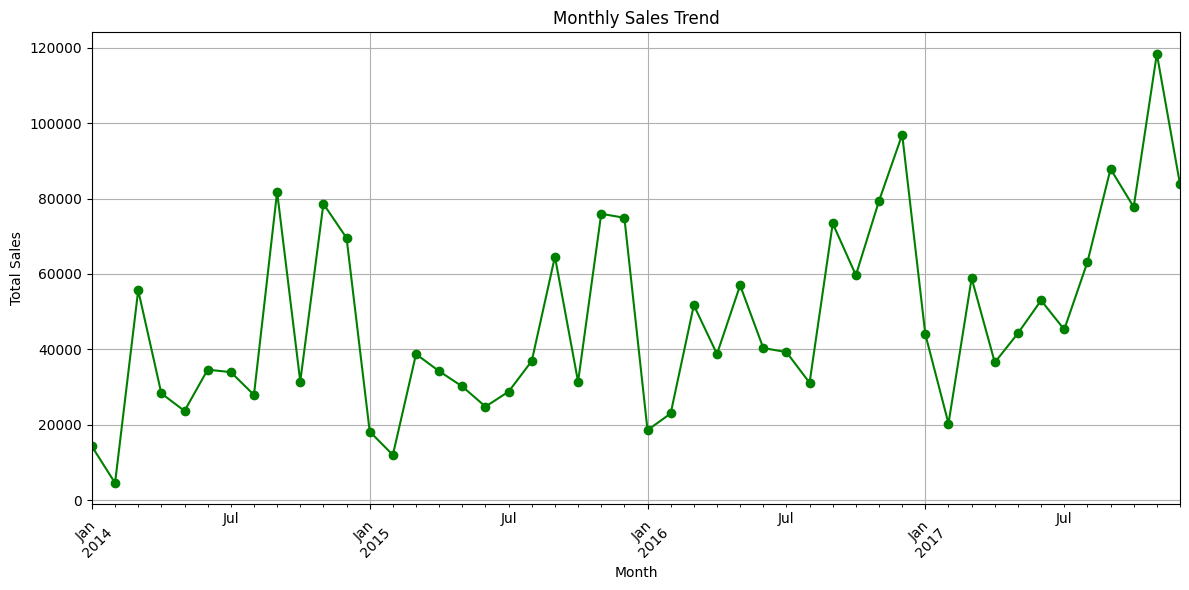

In [ ]:
monthly_sales.plot(figsize=(12,6), kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)


,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


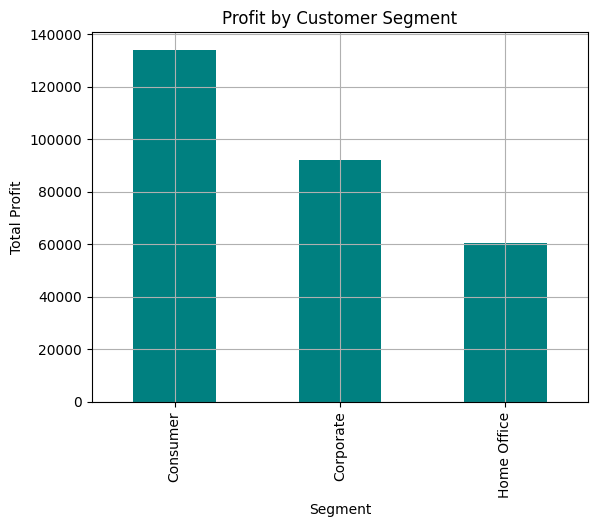

In [ ]:
df.groupby('Segment')['Profit'].sum().plot(kind='bar', color='teal')
plt.title('Profit by Customer Segment')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()


In [ ]:
pivot_table = df.pivot_table(values='Profit', index='Region', columns='Sub-Category', aggfunc='sum')
pivot_table


Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Region,,,,,,,,,,,,,,,,,
Central,7251.6306,-2638.6175,1195.1591,-1043.6369,-1997.9043,6592.7221,15608.8413,1777.5283,236.6186,-3906.2168,1073.0794,-1486.0666,6971.9005,12323.0267,1969.8365,-661.8881,-3559.6504
East,11195.8644,8391.4134,1899.9443,11267.9346,-1167.6318,9357.7706,17022.8418,1812.4090,263.9908,5881.4071,1129.2800,6928.6429,9015.3710,12314.6860,8389.3712,-1155.1352,-11025.3801
South,7004.5424,4123.9396,1058.5866,3900.6640,1339.4918,6612.0893,3658.9067,1465.4770,173.7181,3442.6829,1040.7723,-1438.8930,5947.0614,10767.2753,2274.2965,1.8773,-4623.0579
West,16484.5983,8261.2699,2374.0970,16096.8016,-1646.5117,4027.5843,19327.2351,1908.7624,275.1907,7641.2704,2303.1223,-618.9264,12119.2364,9110.7426,8645.3222,626.0465,1482.6073


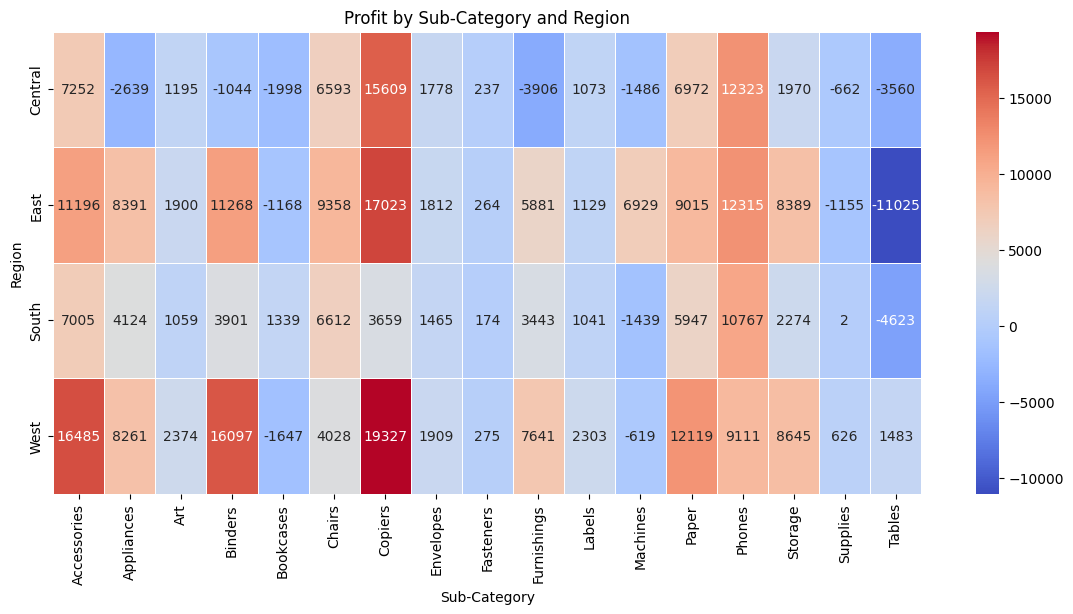

In [ ]:
import seaborn as sns

plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".0f", linewidths=0.5)
plt.title('Profit by Sub-Category and Region')
plt.show()
